In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')

C:\Users\saad_\AppData\Local\Temp\ipykernel_21104\1671037891.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')


In [3]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [4]:
df.shape

(7461195, 13)

In [5]:
df.describe()

,Year of event,Event number of finishers,Athlete year of birth,Athlete ID
count,7.461195e+06,7.461195e+06,6.873034e+06,7.461195e+06
mean,2.011983e+03,1.451969e+03,1.969762e+03,5.536261e+05
std,1.000844e+01,3.124784e+03,1.312560e+01,4.801613e+05
min,1.798000e+03,0.000000e+00,1.193000e+03,0.000000e+00
25%,2.010000e+03,8.800000e+01,1.962000e+03,1.357120e+05
50%,2.015000e+03,2.350000e+02,1.971000e+03,3.944680e+05
75%,2.018000e+03,8.670000e+02,1.979000e+03,1.037699e+06
max,2.022000e+03,2.002700e+04,2.021000e+03,1.641167e+06


In [6]:
# data cleaning

In [7]:
# We only want 50km races between 2018 and 2020
df[df['Event distance/length'] == '50mi']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


In [8]:
df50 = df[(df['Event distance/length'].isin(['50km', '50mi'])) & (df['Year of event'].isin([2020])) & df['Event name'].str.contains(r'\bUSA\b', case=False, na=False)]
df50

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:07:48 h,"*East Lansing, MI",USA,1958.0,F,W60,7.013,816361
2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:22 h,"*Traverse City, MI",USA,1977.0,F,W40,6.706,326469
2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:24 h,"*Traverse City, MI",USA,1962.0,F,W55,6.705,372174
2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:38:30 h,"*Mason, MI",USA,1981.0,F,W35,6.543,860349


In [9]:
df50.shape

(26524, 13)

In [10]:
# Remove 'USA' from the 'Event name' column, leaving the rest of the text
df50.loc[:, 'Event name'] = (df50['Event name']
                             .str.replace(r'\b(USA)\b', '', case=False, regex=True)
                             .str.replace(r'\s*\(.*?\)', '', regex=True)
                             .str.strip()
                             )
df50

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48 h,"*East Lansing, MI",USA,1958.0,F,W60,7.013,816361
2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22 h,"*Traverse City, MI",USA,1977.0,F,W40,6.706,326469
2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24 h,"*Traverse City, MI",USA,1962.0,F,W55,6.705,372174
2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30 h,"*Mason, MI",USA,1981.0,F,W35,6.543,860349


In [11]:
# get the athletes ages
df50.loc[:, 'Athlete age'] = df50['Year of event'] - df50['Athlete year of birth']
df50

C:\Users\saad_\AppData\Local\Temp\ipykernel_21104\195921242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df50.loc[:, 'Athlete age'] = df50['Year of event'] - df50['Athlete year of birth']


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48 h,"*East Lansing, MI",USA,1958.0,F,W60,7.013,816361,62.0
2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22 h,"*Traverse City, MI",USA,1977.0,F,W40,6.706,326469,43.0
2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24 h,"*Traverse City, MI",USA,1962.0,F,W55,6.705,372174,58.0
2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30 h,"*Mason, MI",USA,1981.0,F,W35,6.543,860349,39.0


In [12]:
# remove h from athlete performence
df50.loc[:, 'Athlete performance'] = (df50['Athlete performance']
                             .str.replace(r'\bh\b', '', case=False, regex=True)
                             .str.strip()
                             )
df50

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,"*East Lansing, MI",USA,1958.0,F,W60,7.013,816361,62.0
2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,"*Traverse City, MI",USA,1977.0,F,W40,6.706,326469,43.0
2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,"*Traverse City, MI",USA,1962.0,F,W55,6.705,372174,58.0
2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,"*Mason, MI",USA,1981.0,F,W35,6.543,860349,39.0


In [13]:
# cleunup the dates
df50.loc[:,'Event dates'] = df50['Event dates'].astype(str)
df50.loc[:, 'Event dates'] = (df50['Event dates']
                             .str.replace('\.', '/', case=False, regex=True)
                             .str.strip()
                             )
df50

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete age
2539945,2020,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
2539948,2020,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
2539949,2020,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,"*East Lansing, MI",USA,1958.0,F,W60,7.013,816361,62.0
2760958,2020,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,"*Traverse City, MI",USA,1977.0,F,W40,6.706,326469,43.0
2760959,2020,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,"*Traverse City, MI",USA,1962.0,F,W55,6.705,372174,58.0
2760960,2020,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,"*Mason, MI",USA,1981.0,F,W35,6.543,860349,39.0


In [17]:
# drop columns : Athlete Club, Athlete year of birth
df_cleaned =df50.drop(['Athlete club', 'Athlete year of birth', 'Year of event', 'Athlete ID'], axis=1, inplace=False)
df_cleaned

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete age
2539945,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,USA,M,M23,15.158,29.0
2539946,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,USA,M,M35,12.369,39.0
2539947,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,USA,M,MU23,12.099,21.0
2539948,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,USA,M,M35,11.449,37.0
2539949,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,USA,M,M40,11.212,43.0
...,...,...,...,...,...,...,...,...,...,...
2760957,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,USA,F,W60,7.013,62.0
2760958,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,USA,F,W40,6.706,43.0
2760959,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,USA,F,W55,6.705,58.0
2760960,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,USA,F,W35,6.543,39.0


In [18]:
# remove missing values
df_cleaned.isna().sum()

Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete country                0
Athlete gender                 0
Athlete age category         218
Athlete average speed          0
Athlete age                  235
dtype: int64

In [19]:
df_cleaned = df_cleaned.dropna(axis=0, how='any')

In [20]:
df_cleaned.isna().sum()

Event dates                  0
Event name                   0
Event distance/length        0
Event number of finishers    0
Athlete performance          0
Athlete country              0
Athlete gender               0
Athlete age category         0
Athlete average speed        0
Athlete age                  0
dtype: int64

In [21]:
df_cleaned.shape

(26289, 10)

In [22]:
# check for duplicated values
df_cleaned.duplicated().sum()

34

In [23]:
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned.duplicated().sum()


0

In [24]:
# reset index
df_cleaned.reset_index(drop=True)

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete age
0,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,USA,M,M23,15.158,29.0
1,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,USA,M,M35,12.369,39.0
2,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,USA,M,MU23,12.099,21.0
3,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,USA,M,M35,11.449,37.0
4,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,USA,M,M40,11.212,43.0
...,...,...,...,...,...,...,...,...,...,...
26250,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,USA,F,W60,7.013,62.0
26251,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,USA,F,W40,6.706,43.0
26252,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,USA,F,W55,6.705,58.0
26253,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,USA,F,W35,6.543,39.0


In [25]:
# fixe types
df_cleaned.dtypes

Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete country               object
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete age                  float64
dtype: object

In [26]:
df_cleaned['Athlete age'] = df_cleaned['Athlete age'].astype(int)
df_cleaned['Athlete average speed'] = df_cleaned['Athlete average speed'].astype(float)

In [27]:
df_cleaned.head()

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete age
2539945,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,USA,M,M23,15.158,29
2539946,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,USA,M,M35,12.369,39
2539947,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,USA,M,MU23,12.099,21
2539948,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,USA,M,M35,11.449,37
2539949,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,USA,M,M40,11.212,43


In [28]:
# rename columns
df_cleaned = df_cleaned.rename(columns={
    'Event dates': 'race_date',
    'Event name': 'race_name',
    'Event distance/length': 'race_distance',
    'Event number of finishers': 'number_of_finishers',
    'Athlete performance': 'athlete_performance',
    'Athlete country': 'athlete_country',
    'Athlete gender': 'athlete_gender',
    'Athlete age category': 'race_category',
    'Athlete average speed': 'athlete_average_speed',
    'Athlete age': 'athlete_age'
})

In [29]:
df_cleaned.head()

,race_date,race_name,race_distance,number_of_finishers,athlete_performance,athlete_country,athlete_gender,race_category,athlete_average_speed,athlete_age
2539945,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,USA,M,M23,15.158,29
2539946,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,USA,M,M35,12.369,39
2539947,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,USA,M,MU23,12.099,21
2539948,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,USA,M,M35,11.449,37
2539949,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,USA,M,M40,11.212,43


In [32]:
#reorder columns
df_cleaned = df_cleaned[['race_date', 'race_name', 'race_distance', 'number_of_finishers', 'race_category','athlete_age', 'athlete_gender', 'athlete_average_speed', 'athlete_performance', 'athlete_country',]]
df_cleaned

,race_date,race_name,race_distance,number_of_finishers,race_category,athlete_age,athlete_gender,athlete_average_speed,athlete_performance,athlete_country
2539945,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,M23,29,M,15.158,3:17:55,USA
2539946,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,M35,39,M,12.369,4:02:32,USA
2539947,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,MU23,21,M,12.099,4:07:57,USA
2539948,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,M35,37,M,11.449,4:22:02,USA
2539949,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,M40,43,M,11.212,4:27:34,USA
...,...,...,...,...,...,...,...,...,...,...
2760957,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,W60,62,F,7.013,7:07:48,USA
2760958,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,W40,43,F,6.706,7:27:22,USA
2760959,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,W55,58,F,6.705,7:27:24,USA
2760960,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,W35,39,F,6.543,7:38:30,USA


Charts and graph

<Axes: xlabel='race_distance', ylabel='Count'>

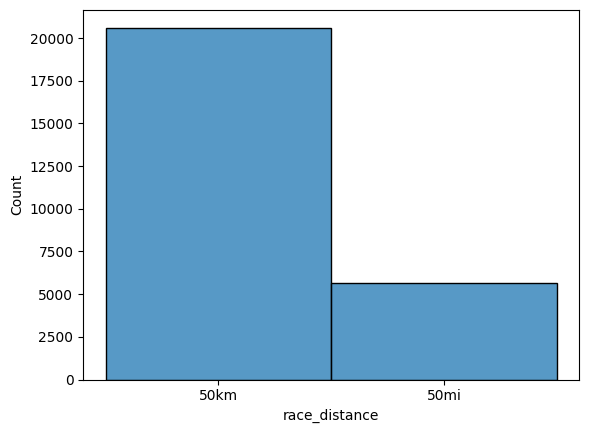

In [34]:
import seaborn as sns
sns.histplot(df_cleaned['race_distance'])

<Axes: xlabel='athlete_gender', ylabel='Count'>

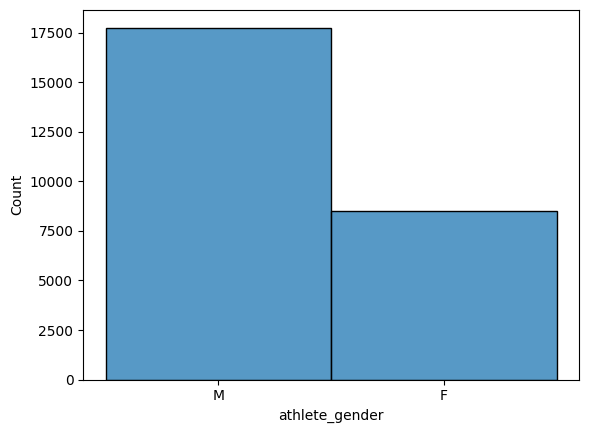

In [41]:
sns.histplot(df_cleaned['athlete_gender'])

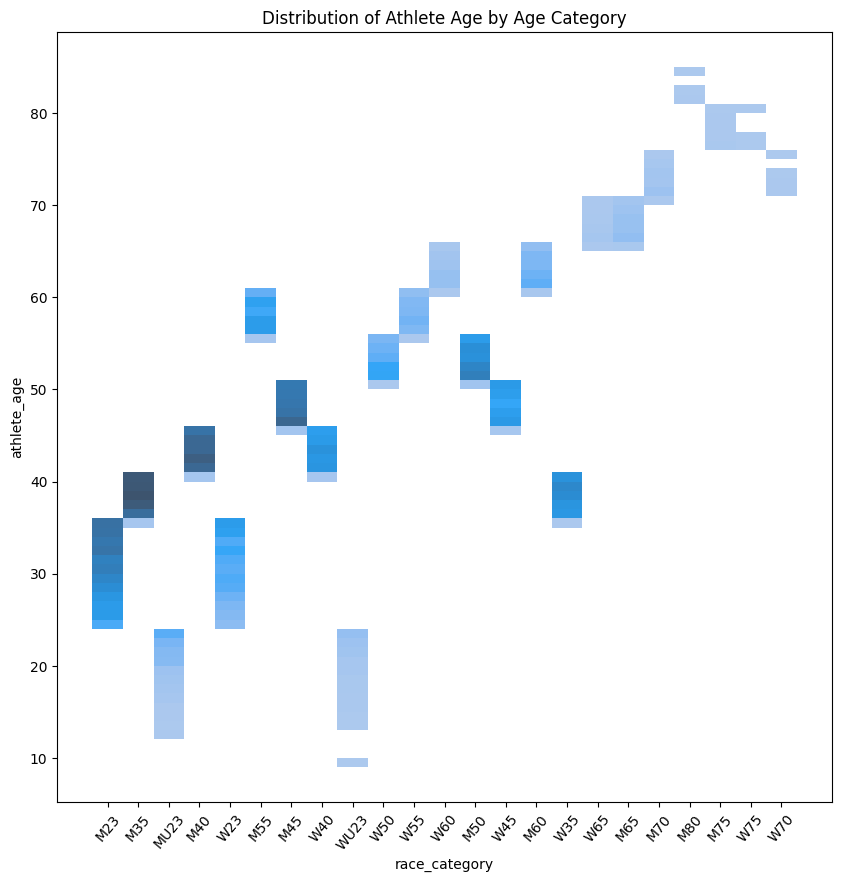

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.histplot(x='race_category', y='athlete_age', data=df_cleaned)
plt.title('Distribution of Athlete Age by Age Category')
plt.xlabel('race_category')
plt.ylabel('athlete_age')
plt.xticks(rotation=50)
plt.show()

<Axes: xlabel='race_distance', ylabel='Count'>

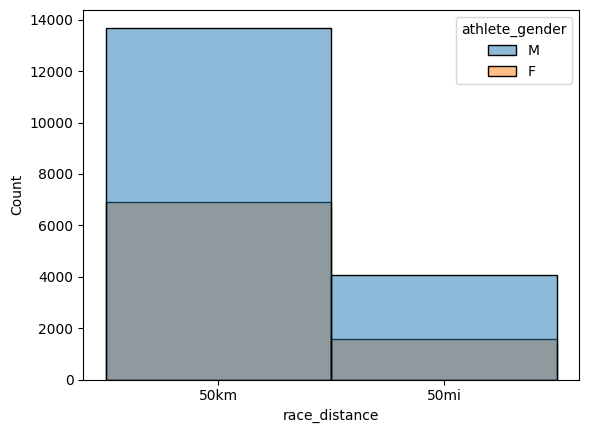

In [47]:
sns.histplot(df_cleaned, x='race_distance', hue='athlete_gender')

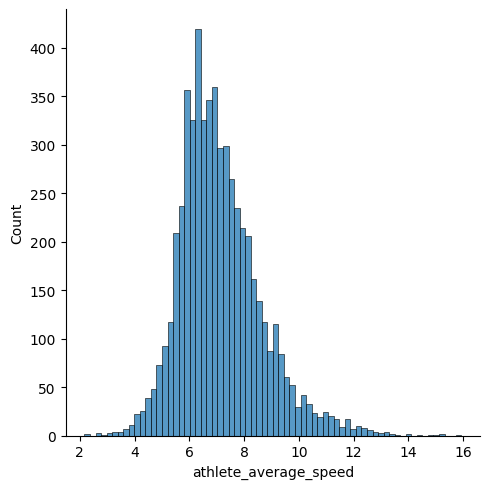

In [49]:
sns.displot(df_cleaned[df_cleaned['race_distance']=='50mi']['athlete_average_speed'])

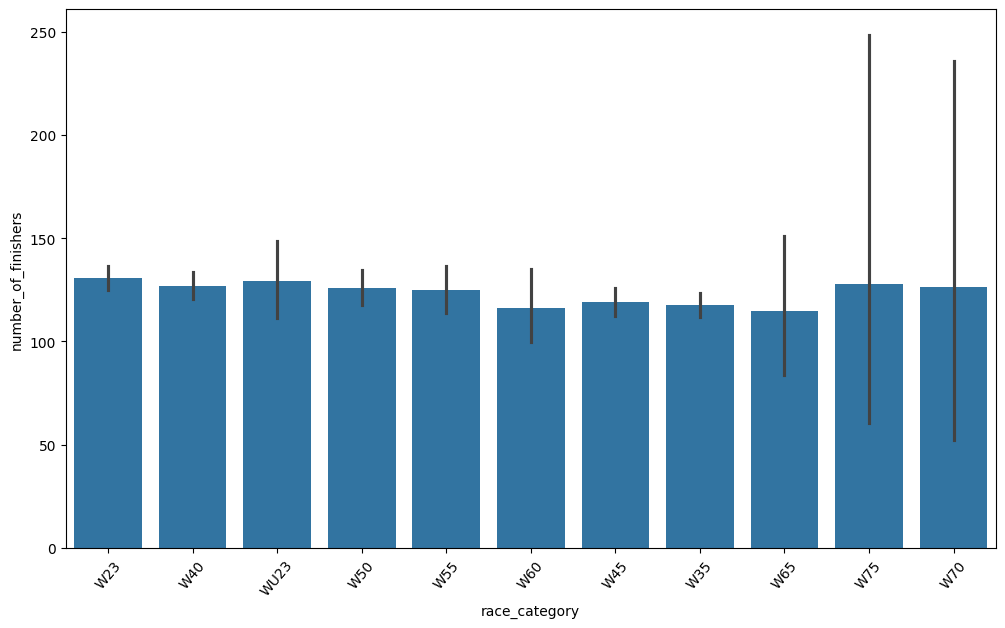

In [71]:
plt.figure(figsize=(12, 7))

sns.barplot(df_cleaned[df_cleaned['athlete_gender'] == 'F'], y='number_of_finishers', x='race_category')
plt.xticks(rotation=50)
plt.show()

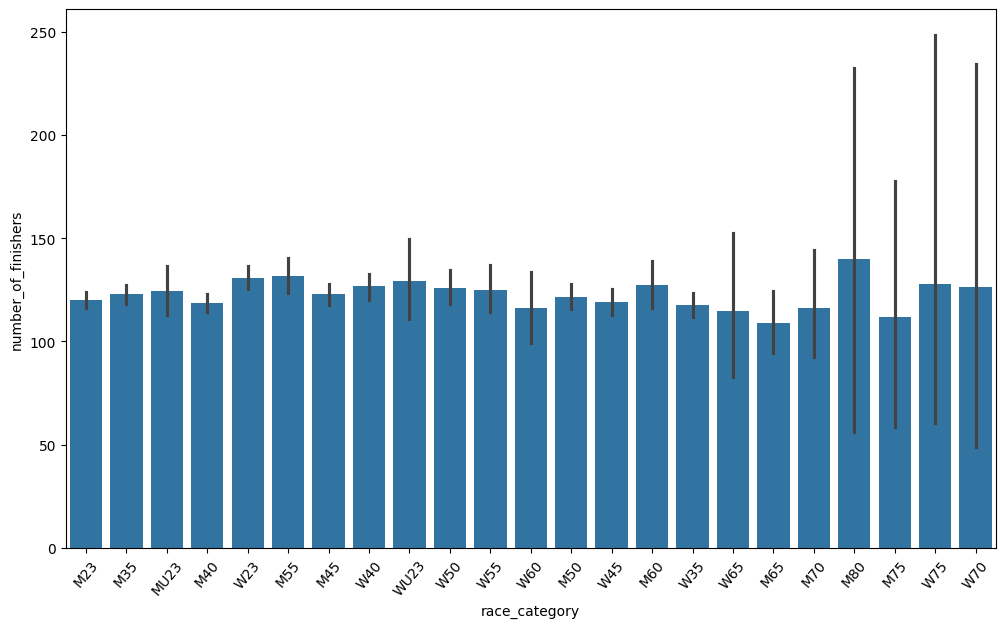

In [72]:
plt.figure(figsize=(12, 7))

sns.barplot(df_cleaned, y='number_of_finishers', x='race_category')
plt.xticks(rotation=50)
plt.show()

<Axes: xlabel='athlete_gender', ylabel='number_of_finishers'>

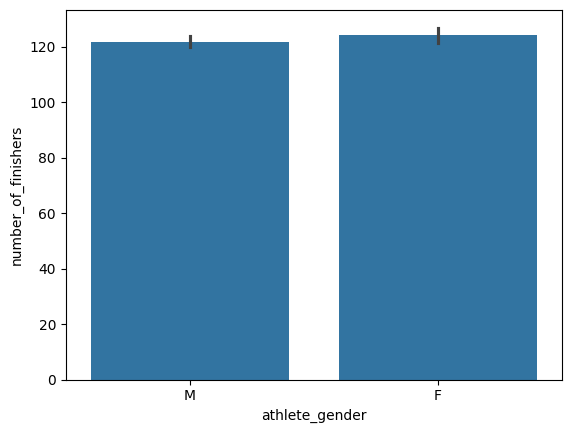

In [70]:
sns.barplot(df_cleaned, x='athlete_gender', y='number_of_finishers')


In [89]:
unique_values = df_cleaned[df_cleaned['race_distance'] == '50km']

num_races_50km = unique_values['race_name'].nunique()
num_races_50km

372

In [90]:
unique_valuesmi = df_cleaned[df_cleaned['race_distance'] == '50mi']

num_races_50mi = unique_valuesmi['race_name'].nunique()
num_races_50mi

124

In [92]:
num_races = df_cleaned['race_name'].nunique()
num_races

496

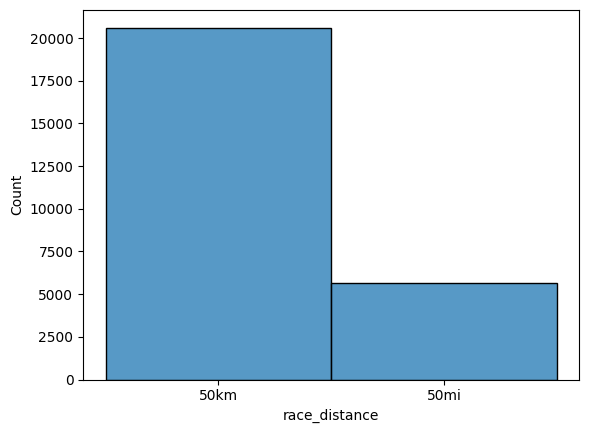

In [97]:
sns.histplot(x='race_distance', data=df_cleaned)
plt.show()

<Axes: xlabel='race_distance', ylabel='athlete_average_speed'>

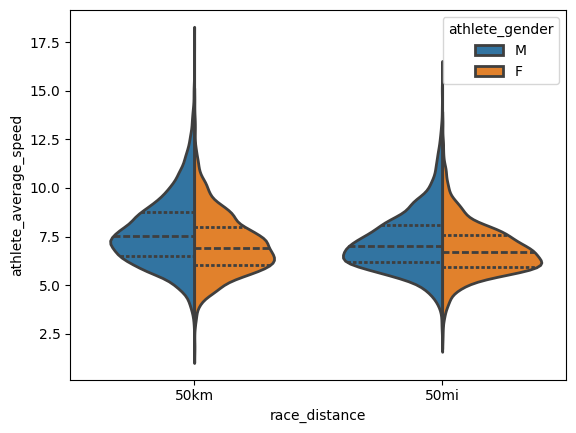

In [100]:
sns.violinplot(data=df_cleaned, x='race_distance', y='athlete_average_speed', hue = 'athlete_gender', split=True, inner='quartile', linewidth=2)

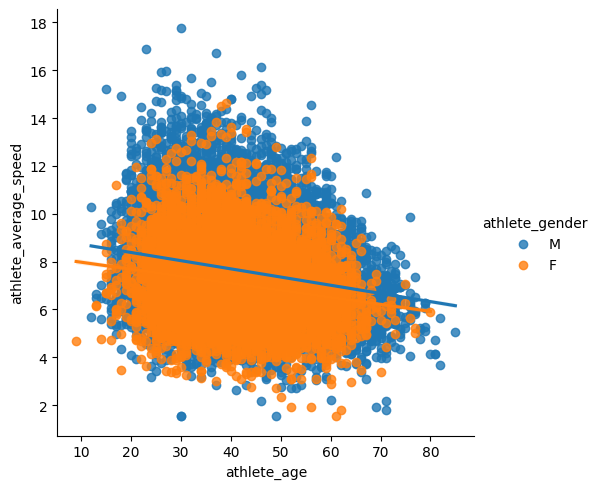

In [102]:
sns.lmplot(data=df_cleaned, x='athlete_age', y='athlete_average_speed', hue= 'athlete_gender')

In [107]:
df_cleaned.groupby(['race_distance', 'athlete_gender'])['athlete_average_speed'].mean()

race_distance  athlete_gender
50km           F                 7.092456
               M                 7.744341
50mi           F                 6.831818
               M                 7.250765
Name: athlete_average_speed, dtype: float64

<Axes: xlabel='race_distance', ylabel='athlete_average_speed'>

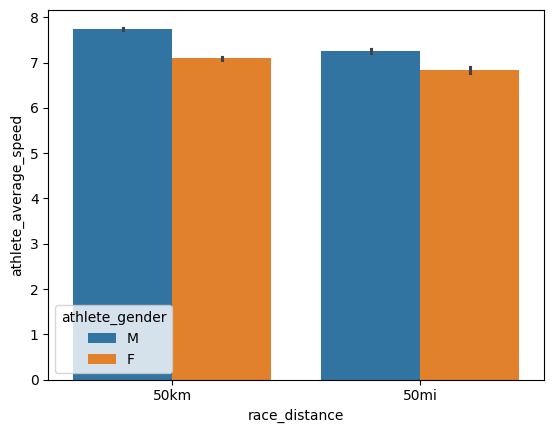

In [106]:
# difference in speed for the 50km, 50mi, between male and female
sns.barplot(df_cleaned, y='athlete_average_speed', x='race_distance', hue= 'athlete_gender')

In [118]:
#what age group is the best in 50mi race

In [112]:
# Filter data for '50mi' race distance
filtered_df = df_cleaned.query('race_distance == "50mi"')

# Group by 'athlete_gender' and calculate mean and count of 'athlete_average_speed'
result = (filtered_df
          .groupby('athlete_age')['athlete_average_speed']
          .agg(['mean', 'count'])
          .sort_values('mean', ascending=False)
          .query('count > 19'))
result

,mean,count
athlete_age,,
29,7.895574,136
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.471053,95
31,7.440842,139
38,7.420884,232
35,7.414633,196
36,7.394645,186


In [132]:
import re
# Function to clean the date column
def clean_date(date_str):
    # Remove everything from the first '-' onwards
    cleaned_date = re.split(r'\s*-\s*', date_str)[0]
    
    # Remove any characters that are not digits or slashes
    cleaned_date = re.sub(r'[^0-9/]', '', cleaned_date)
    
    # Check if the cleaned date part is valid
    # Here we assume valid date length should be in format 'dd/mm/yyyy'
    if len(cleaned_date) < 8:
        return None  # or handle as appropriate

    return cleaned_date

# Apply the function to clean dates
df_cleaned['cleaned_date'] = df_cleaned['race_date'].apply(clean_date)

df_cleaned



,race_date,race_name,race_distance,number_of_finishers,race_category,athlete_age,athlete_gender,athlete_average_speed,athlete_performance,athlete_country,race_month,race_season,cleaned_date
2539945,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,M23,29,M,15.158,3:17:55,USA,2,Winter,02/02/2020
2539946,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,M35,39,M,12.369,4:02:32,USA,2,Winter,02/02/2020
2539947,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,MU23,21,M,12.099,4:07:57,USA,2,Winter,02/02/2020
2539948,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,M35,37,M,11.449,4:22:02,USA,2,Winter,02/02/2020
2539949,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,M40,43,M,11.212,4:27:34,USA,2,Winter,02/02/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,W60,62,F,7.013,7:07:48,USA,10,Fall,03/10/2020
2760958,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,W40,43,F,6.706,7:27:22,USA,10,Fall,03/10/2020
2760959,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,W55,58,F,6.705,7:27:24,USA,10,Fall,03/10/2020
2760960,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,W35,39,F,6.543,7:38:30,USA,10,Fall,03/10/2020


In [133]:
df_cleaned = df_cleaned.dropna(subset=['cleaned_date'])


In [119]:
# which is slower: running in the summer or the winter?

#Winter: 12-2
#Spring: 3-5
#summer: 6-8
#Fall: 9-11

df_cleaned['race_month'] = df_cleaned['race_date'].str.split('/').str.get(1).astype(int)

In [134]:
# df_cleaned['race_season'] = df_cleaned['race_month'].apply(lambda x: 'Winter' if x > 11 else 'Spring' if x > 2 else 'Summer' if x > 5 else 'Fall' if x > 8 else 'Winter')
# df_cleaned

,race_date,race_name,race_distance,number_of_finishers,race_category,athlete_age,athlete_gender,athlete_average_speed,athlete_performance,athlete_country,race_month,race_season,cleaned_date
2539945,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,M23,29,M,15.158,3:17:55,USA,2,Winter,02/02/2020
2539946,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,M35,39,M,12.369,4:02:32,USA,2,Winter,02/02/2020
2539947,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,MU23,21,M,12.099,4:07:57,USA,2,Winter,02/02/2020
2539948,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,M35,37,M,11.449,4:22:02,USA,2,Winter,02/02/2020
2539949,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,M40,43,M,11.212,4:27:34,USA,2,Winter,02/02/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,W60,62,F,7.013,7:07:48,USA,10,Spring,03/10/2020
2760958,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,W40,43,F,6.706,7:27:22,USA,10,Spring,03/10/2020
2760959,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,W55,58,F,6.705,7:27:24,USA,10,Spring,03/10/2020
2760960,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,W35,39,F,6.543,7:38:30,USA,10,Spring,03/10/2020


In [136]:
# Define a function to classify seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the function to create the 'race_season' column
df_cleaned['race_season'] = df_cleaned['race_month'].apply(get_season)

In [137]:
df_cleaned

,race_date,race_name,race_distance,number_of_finishers,race_category,athlete_age,athlete_gender,athlete_average_speed,athlete_performance,athlete_country,race_month,race_season,cleaned_date
2539945,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,M23,29,M,15.158,3:17:55,USA,2,Winter,02/02/2020
2539946,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,M35,39,M,12.369,4:02:32,USA,2,Winter,02/02/2020
2539947,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,MU23,21,M,12.099,4:07:57,USA,2,Winter,02/02/2020
2539948,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,M35,37,M,11.449,4:22:02,USA,2,Winter,02/02/2020
2539949,02/02/2020,West Seattle Beach Run - Winter Edition,50km,20,M40,43,M,11.212,4:27:34,USA,2,Winter,02/02/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,W60,62,F,7.013,7:07:48,USA,10,Fall,03/10/2020
2760958,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,W40,43,F,6.706,7:27:22,USA,10,Fall,03/10/2020
2760959,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,W55,58,F,6.705,7:27:24,USA,10,Fall,03/10/2020
2760960,03/10/2020,Yankee Springs Fall Trail Run Festival,50km,30,W35,39,F,6.543,7:38:30,USA,10,Fall,03/10/2020


In [140]:
# df_cleaned.groupby('race_season')['athlete_average_speed'].agg('mean', 'count').sort_values('mean', ascending=False)

# Group by 'race_season' and calculate mean and count
season_stats = df_cleaned.groupby('race_season')['athlete_average_speed'].agg(['mean', 'count'])

# Sort by mean average speed in descending order
season_stats_sorted = season_stats.sort_values('mean', ascending=False)

season_stats_sorted

,mean,count
race_season,,
Spring,7.705383,3380
Winter,7.613191,10512
Fall,7.407110,8306
Summer,6.860944,2758


In [143]:
# 50mi only

# Group by 'race_season' and calculate mean and count
season_miles = df_cleaned.query('race_distance == "50mi"').groupby('race_season')['athlete_average_speed'].agg(['mean', 'count'])

# Sort by mean average speed in descending order
season_miles_sorted = season_miles.sort_values('mean', ascending=False)

season_miles_sorted

,mean,count
race_season,,
Fall,7.512172,1995
Winter,7.303483,1324
Spring,7.084005,834
Summer,6.487443,839
